In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Read in model file names

In [2]:
read_path = "dataGeneration/feature_target_test"
model_path = "dataGeneration/model_test"


feature_target_dir = os.path.join(os.getcwd(), read_path)
feature_target_files = os.listdir(feature_target_dir)
print("Total feature_target number: ", len(feature_target_files))

model_dir = os.path.join(os.getcwd(), model_path)
model_files = os.listdir(model_dir)
print("Total model number: ", len(model_files))


Total feature_target number:  200
Total model number:  200


In [3]:
sample = []

for file in feature_target_files:
    with open(os.path.join(feature_target_dir, file), 'rb') as f:
        loaded_dict = pickle.load(f)
        sample.append(loaded_dict)
        f.close()


### Normalizing data

In [4]:
loadMatrix = np.array([x["Load"] for x in sample])
solarMatrix = np.array([x["Solar"] for x in sample])

nbScen = solarMatrix.shape[1]
nbBus = loadMatrix.shape[1]
nbSolar = solarMatrix.shape[2]
nbTime = loadMatrix.shape[2]
nbSample = loadMatrix.shape[0]

print(loadMatrix.shape, solarMatrix.shape)
print(nbScen, nbBus, nbSolar, nbTime)

(200, 66, 48) (200, 5, 3, 48)
5 66 3 48


In [5]:
loadScaler = MinMaxScaler()
solarScaler = MinMaxScaler()

loadScaler.fit(loadMatrix.reshape(nbSample, -1))
solarScaler.fit(solarMatrix.reshape(nbSample, -1))

loadNormalized = loadScaler.transform(loadMatrix.reshape(nbSample, -1))
solarNormalized = solarScaler.transform(solarMatrix.reshape(nbSample, -1))

loadNormalized = loadNormalized.reshape(-1, nbBus, nbTime)
solarNormalized = solarNormalized.reshape(nbSample, -1, nbSolar, nbTime)

# plt.plot(solarNormalized[0, 1,:])
print(loadNormalized.shape, solarNormalized.shape)

(200, 66, 48) (200, 5, 3, 48)


### Plot out Solar to make sure reshape is fine

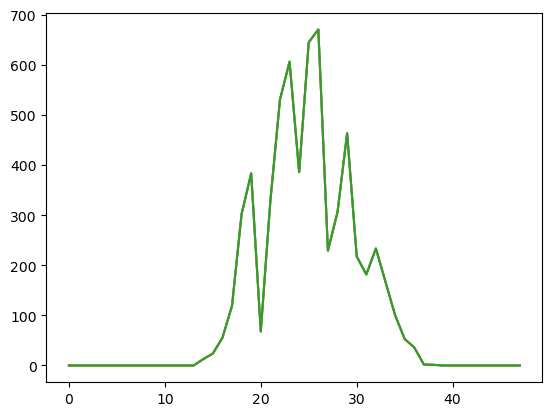

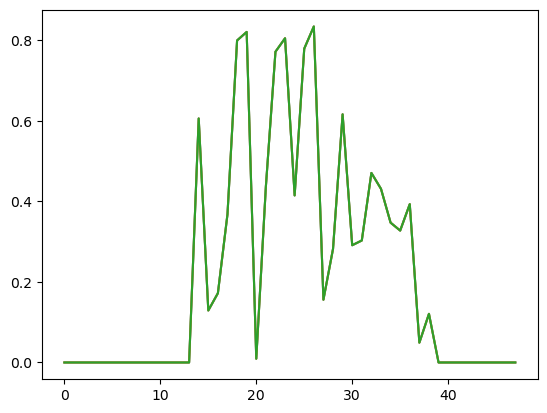

In [6]:
ScenNum = 2
num = 3
# for i in range(5):
for j in range(nbSolar):
    plt.plot(solarMatrix[ScenNum,num,j,:])

plt.show()

for k in range(nbSolar):
    plt.plot(solarNormalized[ScenNum,num,k,:])

plt.show()

### Check Database EV Number

In [7]:
charging_station = np.squeeze(pd.read_csv(os.path.join(os.path.join(os.getcwd(), 'systemData'), 'cs_params_variable.csv')).to_numpy())
nbCS = len(charging_station)

data_dir = os.path.join(os.getcwd(), 'systemData')
EV_routes = pd.read_csv(os.path.join(data_dir, 'EV_routes.csv')).to_numpy()
nbRoute = EV_routes.shape[0]

max_EV = 100
max_pad_schedule = max_EV*4
max_pad_bin = (max_EV * (nbRoute*(nbTime-1) + nbCS*nbTime*2))*nbScen

# uncomment to check number of EV in dataset
unique, counts = np.unique([x["Binary"].shape[0] / (nbRoute*(nbTime-1) + nbCS*nbTime*2) for x in sample], return_counts=True)
print(dict(zip(unique/5, counts)))

indicesMatrix = np.array([np.pad(x["Indices"], ((0,max_pad_bin - x["Indices"].shape[0]),), 'constant', constant_values=0) for x in sample])
scheduleMatrix = np.array([np.pad(x["Schedule"], ((0,max_pad_schedule - int(x["Schedule"].shape[0])),(0,0)), 'constant', constant_values=0) for x in sample]).astype("int16")

binaryMatrix = []
# binary needs to be padded separately for accuracy testing purpose
for x in sample:
    bin_vars = np.array(x["Binary"])
    bin_vars = bin_vars.reshape(nbScen,-1)
    
    # pad each scenario
    bin_vars = np.pad(bin_vars, ((0,0), (0, int(max_pad_bin/nbScen) - bin_vars.shape[1])), 'constant', constant_values=0)
    print(bin_vars.shape)

    binaryMatrix.append(bin_vars.reshape(-1,))

binaryMatrix = np.array(binaryMatrix)

print(binaryMatrix[0].shape, indicesMatrix[0].shape, scheduleMatrix[0].shape)



{21.0: 2, 22.0: 2, 23.0: 1, 24.0: 2, 26.0: 1, 27.0: 2, 28.0: 1, 29.0: 2, 31.0: 2, 32.0: 1, 33.0: 2, 34.0: 1, 36.0: 2, 37.0: 1, 38.0: 2, 39.0: 1, 41.0: 2, 42.0: 2, 43.0: 1, 44.0: 2, 46.0: 1, 47.0: 2, 48.0: 1, 49.0: 2, 51.0: 2, 52.0: 1, 53.0: 2, 54.0: 1, 56.0: 2, 57.0: 1, 58.0: 2, 59.0: 1, 61.0: 6, 62.0: 5, 63.0: 4, 64.0: 5, 66.0: 4, 67.0: 5, 68.0: 4, 69.0: 5, 71.0: 6, 72.0: 4, 73.0: 5, 74.0: 4, 76.0: 5, 77.0: 4, 78.0: 5, 79.0: 4, 81.0: 6, 82.0: 5, 83.0: 4, 84.0: 5, 86.0: 4, 87.0: 5, 88.0: 4, 89.0: 5, 91.0: 6, 92.0: 4, 93.0: 5, 94.0: 4, 96.0: 5, 97.0: 4, 98.0: 5, 99.0: 4}
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5, 767300)
(5,

### Preprocessing schedules

In [8]:
scheduleMatrix = scheduleMatrix.astype("int16")

processedScheduleMatrix = np.zeros((scheduleMatrix.shape[0], max_EV, nbTime))

for i in range(scheduleMatrix.shape[0]):
    for s in range(scheduleMatrix.shape[1]):
        processedScheduleMatrix[i, scheduleMatrix[i,s,0], scheduleMatrix[i,s,2]] = scheduleMatrix[i,s,1]

print(processedScheduleMatrix.shape)



(200, 100, 48)


In [9]:
scheduleScaler = MinMaxScaler()
scheduleScaler.fit(processedScheduleMatrix.reshape(nbSample,-1))
scheduleNormalized = scheduleScaler.transform(processedScheduleMatrix.reshape(nbSample,-1))
scheduleNormalized = scheduleNormalized.reshape(-1, max_EV, nbTime)

print(scheduleNormalized.shape)

(200, 100, 48)


### Append Features together

In [10]:
loadNormalized = np.repeat(loadNormalized[:, np.newaxis, :, :], nbScen, axis=1) 
scheduleNormalized = np.repeat(scheduleNormalized[:, np.newaxis, :, :], nbScen, axis=1)

In [11]:
feature = np.append(loadNormalized, solarNormalized, axis=2)
feature = np.append(feature, scheduleNormalized, axis=2)
feature = np.transpose(feature, (0,1,3,2))

binaryMatrix = binaryMatrix.reshape(len(feature_target_files), nbScen, -1)
indicesMatrix = indicesMatrix.reshape(len(feature_target_files), nbScen, -1)

print(feature.shape)
print(binaryMatrix.shape)
print(indicesMatrix.shape)

(200, 5, 48, 169)
(200, 5, 767300)
(200, 5, 767300)


### Read in Rest of the Parameters

In [12]:
solTimeMatrix = np.array([x["solve_time"] for x in sample])
objValMatrix = np.array([x["Obj_val"] for x in sample])
nbEVMatrix = np.array([x["nbEV"] for x in sample])
modelNumMatrix = np.array([x["model"] for x in sample])


### Split data for training and testing

In [13]:
feature_test = feature
print(feature_test.shape)

binary_test = binaryMatrix
print(binary_test.shape)
indices_test = indicesMatrix
print(indices_test.shape)

solTime_test = solTimeMatrix
objVal_test = objValMatrix
schedule_test = scheduleMatrix
model_test = modelNumMatrix

print(solTime_test.shape)
print(objVal_test.shape)
print(schedule_test.shape)
print(model_test.shape)

(200, 5, 48, 169)
(200, 5, 767300)
(200, 5, 767300)
(200,)
(200,)
(200, 400, 3)
(200,)


### Save preprocessed data

In [14]:
train_test_dir = os.path.join(os.getcwd(), f"dataGeneration/preprocessed_data_test")

np.save(os.path.join(train_test_dir, "X_test.npy"), feature_test)

np.save(os.path.join(train_test_dir, "y_test.npy"), binary_test)

np.save(os.path.join(train_test_dir, "indices_test.npy"), indices_test)

np.save(os.path.join(train_test_dir, "solTime_test.npy"), solTime_test)
np.save(os.path.join(train_test_dir, "objVal_test.npy"), objVal_test)
np.save(os.path.join(train_test_dir, "schedule_test.npy"), schedule_test)
np.save(os.path.join(train_test_dir, "model_test.npy"), model_test)

